In [ ]:
!pip install emoji

In [3]:
import pandas as pd
import numpy as np
import nltk
import re
import string
import emoji


nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')
nltk.download('wordnet')

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from bs4 import BeautifulSoup


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Stephane\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Stephane\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Stephane\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Stephane\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [4]:
# Chargement du dataset

df=pd.read_csv("Travel-Insured-International_Custumers_Reviews.csv")

In [5]:
df.shape

(900, 6)

In [6]:
df.head()

,rate,title,content,review_date,Reviews,Sentiment
0,5,Better Than Thought,We purchased a travel plan from Travel Insured...,2025-02-14,Better Than Thought. We purchased a travel pla...,POSITIVE
1,5,Fortunately we didn’t have to use our…,Fortunately we didn’t have to use our travel i...,2024-11-25,Fortunately we didn’t have to use our travel i...,NEGATIVE
2,5,Insurance was easy to purchase,Insurance was easy to purchase online & gave m...,2024-11-01,Insurance was easy to purchase online & gave m...,NEGATIVE
3,5,Peace of mind,Isabel took care of our travel insurance needs...,2025-01-18,Peace of mind. Isabel took care of our travel ...,POSITIVE
4,5,ABC ruise coverage,Policy issued same day with good coverage expl...,2025-01-28,ABC ruise coverage. Policy issued same day wit...,NEGATIVE


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   rate         900 non-null    int64 
 1   title        900 non-null    object
 2   content      839 non-null    object
 3   review_date  900 non-null    object
 4   Reviews      900 non-null    object
 5   Sentiment    900 non-null    object
dtypes: int64(1), object(5)
memory usage: 42.3+ KB


In [8]:
rows_duplicated = df.duplicated().sum()
print("Nombre de doublons :",rows_duplicated )

Nombre de doublons : 0


# Nettoyage de texte

### Nous allons convertir les avis en miniscules, supprimer la ponctuation,les chiffres,les caractères spéciaux et les balises HTML.

In [9]:
def clean_reviews (text):
    text = emoji.demojize(text)                                        #Convertir les émojis en texte
    text = BeautifulSoup(text,"html.parser").get_text()                #Supprime les balises HTML
    text = text.lower()                                                #Mettre en minuscule
    text = re.sub('r\d+', '',text)                                     #Supprime les chiffres
    text = text.translate(str.maketrans('','',string.punctuation))     #Supprime la ponctuation
    text = re.sub(r'\W', ' ',text)                                     #Supprime les caractères spéciaux
    text = re.sub(r'\s', ' ',text).strip()                             # Supprime les espaces multiples
    return text

df["cleaned_reviews"] = df["Reviews"].apply(clean_reviews)

<>:5: SyntaxWarning: invalid escape sequence '\d'
<>:5: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Stephane\AppData\Local\Temp\ipykernel_7088\1388303480.py:5: SyntaxWarning: invalid escape sequence '\d'
  text = re.sub('r\d+', '',text)                                     #Supprime les chiffres


In [10]:
df.head(5)

,rate,title,content,review_date,Reviews,Sentiment,cleaned_reviews
0,5,Better Than Thought,We purchased a travel plan from Travel Insured...,2025-02-14,Better Than Thought. We purchased a travel pla...,POSITIVE,better than thought we purchased a travel plan...
1,5,Fortunately we didn’t have to use our…,Fortunately we didn’t have to use our travel i...,2024-11-25,Fortunately we didn’t have to use our travel i...,NEGATIVE,fortunately we didn t have to use our travel i...
2,5,Insurance was easy to purchase,Insurance was easy to purchase online & gave m...,2024-11-01,Insurance was easy to purchase online & gave m...,NEGATIVE,insurance was easy to purchase online gave me...
3,5,Peace of mind,Isabel took care of our travel insurance needs...,2025-01-18,Peace of mind. Isabel took care of our travel ...,POSITIVE,peace of mind isabel took care of our travel i...
4,5,ABC ruise coverage,Policy issued same day with good coverage expl...,2025-01-28,ABC ruise coverage. Policy issued same day wit...,NEGATIVE,abc ruise coverage policy issued same day with...


### Nous diviserons les avis en jetons(mots).

In [11]:
df["tokenized_reviews"] = df["cleaned_reviews"].apply(word_tokenize) 

In [12]:
df.head(5)

,rate,title,content,review_date,Reviews,Sentiment,cleaned_reviews,tokenized_reviews
0,5,Better Than Thought,We purchased a travel plan from Travel Insured...,2025-02-14,Better Than Thought. We purchased a travel pla...,POSITIVE,better than thought we purchased a travel plan...,"[better, than, thought, we, purchased, a, trav..."
1,5,Fortunately we didn’t have to use our…,Fortunately we didn’t have to use our travel i...,2024-11-25,Fortunately we didn’t have to use our travel i...,NEGATIVE,fortunately we didn t have to use our travel i...,"[fortunately, we, didn, t, have, to, use, our,..."
2,5,Insurance was easy to purchase,Insurance was easy to purchase online & gave m...,2024-11-01,Insurance was easy to purchase online & gave m...,NEGATIVE,insurance was easy to purchase online gave me...,"[insurance, was, easy, to, purchase, online, g..."
3,5,Peace of mind,Isabel took care of our travel insurance needs...,2025-01-18,Peace of mind. Isabel took care of our travel ...,POSITIVE,peace of mind isabel took care of our travel i...,"[peace, of, mind, isabel, took, care, of, our,..."
4,5,ABC ruise coverage,Policy issued same day with good coverage expl...,2025-01-28,ABC ruise coverage. Policy issued same day wit...,NEGATIVE,abc ruise coverage policy issued same day with...,"[abc, ruise, coverage, policy, issued, same, d..."


### Nous supprimons les mots vides.

In [12]:
stop_words = set(stopwords.words('english'))

stop_words_adding = {"flight","airline","plane","airport","boarding","passenger","luggage","baggage","airways","travel","trip","custumer","claim","policy","insurance","service","agent","company","provider","emergency","refund"}
stop_words.update(stop_words_adding)

df["filtred_tok"] = df["tokenized_reviews"].apply(lambda tokens: [word for word in tokens if word.lower() not in stop_words ])

In [13]:
print(df[["tokenized_reviews","filtred_tok"]].head(5))

                                   tokenized_reviews  \
0  [better, than, thought, we, purchased, a, trav...   
1  [fortunately, we, didn, t, have, to, use, our,...   
2  [insurance, was, easy, to, purchase, online, g...   
3  [peace, of, mind, isabel, took, care, of, our,...   
4  [abc, ruise, coverage, policy, issued, same, d...   

                                         filtred_tok  
0  [better, thought, purchased, plan, insured, in...  
1  [fortunately, use, gave, us, peace, mind, know...  
2  [easy, purchase, online, gave, coverage, neede...  
3  [peace, mind, isabel, took, care, needs, broug...  
4  [abc, ruise, coverage, issued, day, good, cove...  


### Nous regardons les mots les plus fréquents avant et après filtrage des stopwords.

In [14]:
from collections import Counter

all_words_before = [word.lower() for tokens in df["tokenized_reviews"] for word in tokens]
word_freq_before = Counter(all_words_before)

print("Mots les plus fréquents Avant filtrage:")
print(word_freq_before.most_common(30))

Mots les plus fréquents Avant filtrage:
[('the', 1238), ('to', 1226), ('i', 1033), ('and', 866), ('a', 687), ('was', 674), ('of', 508), ('it', 463), ('for', 442), ('insurance', 431), ('travel', 405), ('my', 401), ('we', 393), ('have', 356), ('not', 344), ('that', 331), ('had', 297), ('in', 294), ('claim', 291), ('trip', 269), ('with', 244), ('easy', 234), ('use', 233), ('is', 226), ('but', 217), ('on', 196), ('you', 196), ('this', 183), ('very', 182), ('need', 179)]


In [15]:
all_words_after = [word.lower() for tokens in df["filtred_tok"] for word in tokens]
word_freq_after = Counter(all_words_after)

print("Mots les plus fréquents Après filtrage:")
print(word_freq_after.most_common(30))

Mots les plus fréquents Après filtrage:
[('easy', 234), ('use', 233), ('need', 179), ('coverage', 169), ('insured', 155), ('great', 141), ('good', 123), ('would', 117), ('needed', 114), ('mind', 108), ('peace', 95), ('process', 92), ('never', 83), ('experience', 81), ('didnt', 80), ('time', 78), ('customer', 78), ('knowing', 75), ('purchase', 75), ('claims', 75), ('us', 73), ('international', 70), ('get', 70), ('covered', 65), ('used', 58), ('price', 58), ('make', 56), ('made', 56), ('know', 56), ('medical', 53)]


### Nous allons observer le Nuage de mots des mots obtenus avant et après filtrage de la tokenisation.

In [16]:
#from wordcloud import WordCloud
#import matplotlib.pyplot as plt

In [17]:
#wordCloud1 = WordCloud(max_font_size=100,max_words=200,background_color="black").generate_from_frequencies(word_freq_before)
#plt.figure(figsize=(10,5))
#plt.imshow(wordCloud1, interpolation="bilinear")
#plt.axis("off")
#plt.title("WordCloud AVANT filtrage")
#plt.show()

In [18]:
#wordCloud2 = WordCloud(max_font_size=100,max_words=200,background_color="black").generate(word_freq_after)
#plt.figure(figsize=(10,5))
#plt.imshow(wordCloud2, interpolation="bilinear")
#plt.axis("off")
#plt.title("WordCloud APRES filtrage")
#plt.show()

### Réduire les mots à leurs formes de base en utilisant la stemming et la lemmatisation

In [19]:
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

stemmed_filtred_tok = [[stemmer.stem(word) for word in doc] for doc in df["filtred_tok"]]
lemmatized_filtred_tok = [[lemmatizer.lemmatize(word) for word in doc] for doc in df["filtred_tok"]]


In [20]:
print(stemmed_filtred_tok)

[['better', 'thought', 'purchas', 'plan', 'insur', 'intern', 'month', 'ago', 'cancel', 'spoke', 'seren', 'whose', 'help', 'support', 'excel', 'throughout', 'convers', 'alway', 'kind', 'respect', 'profession', 'great', 'listen', 'found', 'varieti', 'way', 'explain', 'process', 'work', 'patienc', 'allow', 'leav', 'convers', '25', 'minut', 'later', 'complet', 'understand', 'satisfact', 'outcom', 'thank', 'insur', 'intl', 'well', 'back'], ['fortun', 'use', 'gave', 'us', 'peac', 'mind', 'know', 'insur'], ['easi', 'purchas', 'onlin', 'gave', 'coverag', 'need', 'use'], ['peac', 'mind', 'isabel', 'took', 'care', 'need', 'brought', 'us', 'peac', 'mind', 'encount', 'issu', 'need', 'medic', 'assist'], ['abc', 'ruis', 'coverag', 'issu', 'day', 'good', 'coverag', 'explan', 'chang', 'one', 'travel', 'two', 'told', 'would', '56', 'daysit', 'done', 'dayfollow', 'up', 'remind', 'coverag', 'contact'], ['thank', 'activ', 'travel', 'recent', 'past', 'insur', 'easi', 'deal', 'reimburs', 'prompt'], ['reason

In [21]:
print(lemmatized_filtred_tok)

[['better', 'thought', 'purchased', 'plan', 'insured', 'international', 'month', 'ago', 'cancel', 'spoke', 'sereniti', 'whose', 'help', 'support', 'excellent', 'throughout', 'conversation', 'always', 'kind', 'respectful', 'professional', 'great', 'listener', 'found', 'variety', 'way', 'explain', 'process', 'worked', 'patience', 'allowed', 'leave', 'conversation', '25', 'minute', 'later', 'complete', 'understanding', 'satisfaction', 'outcome', 'thanks', 'insured', 'intl', 'well', 'back'], ['fortunately', 'use', 'gave', 'u', 'peace', 'mind', 'knowing', 'insured'], ['easy', 'purchase', 'online', 'gave', 'coverage', 'needed', 'used'], ['peace', 'mind', 'isabel', 'took', 'care', 'need', 'brought', 'u', 'peace', 'mind', 'encountered', 'issue', 'need', 'medical', 'assistance'], ['abc', 'ruise', 'coverage', 'issued', 'day', 'good', 'coverage', 'explanation', 'changed', 'one', 'traveler', 'two', 'told', 'would', '56', 'daysit', 'done', 'dayfollow', 'ups', 'remind', 'coverage', 'contact'], ['tha

# Analyse des notes et sentiments

In [22]:
df["review_date"] = pd.to_datetime(df["review_date"])

#Extraiction de l'année et le mois
df["year"]      = df["review_date"].dt.year.astype(str)  #conversion en string pour pouvoir indexer
df["month"]     = df["review_date"].dt.strftime("%m")
df["year_month"]  = df["year"]+ "-" + df["month"]

### Moyenne des notes(rate) par mois et années

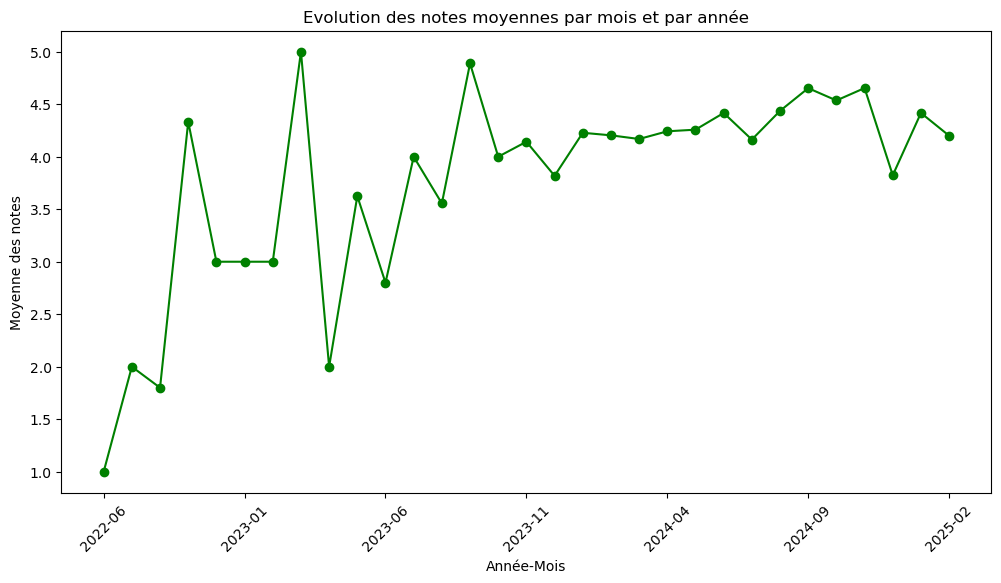

In [24]:
import matplotlib.pyplot as plt

monthly_rates = df.groupby("year_month")["rate"].mean()

plt.figure(figsize=(12,6))
monthly_rates.plot(marker='o',linestyle="-",color="green")
plt.title("Evolution des notes moyennes par mois et par année")
plt.xlabel("Année-Mois")
plt.ylabel("Moyenne des notes")
plt.xticks(rotation=45)
plt.show()

### Répartition des sentiments par mois et années

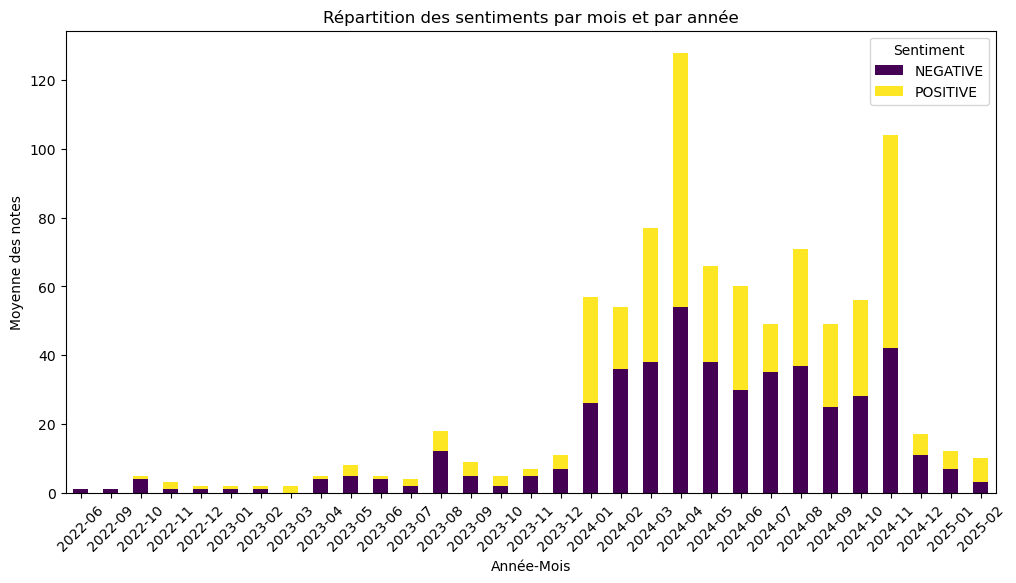

In [30]:
monthly_sentiments = df.groupby(["year_month","Sentiment"]).size().unstack()

monthly_sentiments.plot(kind='bar',stacked="-True",figsize=(12,6),colormap="viridis")
plt.title("Répartition des sentiments par mois et par année")
plt.xlabel("Année-Mois")
plt.ylabel("Moyenne des notes")
plt.xticks(rotation=45)
plt.legend(title="Sentiment")
plt.show()

### Mots les plus fréquents par mois et anées

In [26]:
def top_word_by_year_month (year_month):
    reviews_filt = df[df["year_month"] == year_month]["filtred_tok"]
    words_reviews_filt = (word for review in reviews_filt for word in review)
    return Counter(words_reviews_filt).most_common(15)



In [27]:
# Obtenir toutes les périodes uniques 
unique_year_months = df["year_month"].unique()

#Affichage des mots le splus fréquents de ces périodes
for year_month in unique_year_months :
    top_words = top_word_by_year_month (year_month)
    print(f"\n Mots les plus fréquents en {year_month}:{top_words}")


 Mots les plus fréquents en 2025-02:[('experience', 4), ('purchased', 3), ('great', 3), ('insured', 2), ('help', 2), ('excellent', 2), ('conversation', 2), ('process', 2), ('well', 2), ('best', 2), ('phone', 2), ('money', 2), ('actually', 2), ('personal', 2), ('make', 2)]

 Mots les plus fréquents en 2024-11:[('easy', 29), ('use', 24), ('coverage', 23), ('need', 22), ('great', 14), ('process', 13), ('needed', 12), ('never', 10), ('good', 10), ('would', 9), ('us', 8), ('peace', 8), ('mind', 8), ('helpful', 8), ('insured', 7)]

 Mots les plus fréquents en 2025-01:[('peace', 4), ('mind', 4), ('good', 4), ('delay', 4), ('issues', 3), ('coverage', 3), ('missed', 3), ('provided', 3), ('need', 2), ('one', 2), ('two', 2), ('told', 2), ('would', 2), ('professional', 2), ('problem', 2)]

 Mots les plus fréquents en 2024-10:[('use', 22), ('easy', 13), ('great', 10), ('coverage', 10), ('need', 9), ('good', 9), ('needed', 9), ('insured', 7), ('customer', 7), ('purchase', 6), ('didnt', 6), ('went',

### Affichage du nuage de mots des mots les plus fréquents par mois et années

In [28]:
def plot_wordcloud(year_month):
    words = top_word_by_year_month (year_month)
    word_freq = dict(words)                
    wordcloud = WordCloud(width=800,height=400,background_color='white').generate_from_frequencies(word_freq)
    plt.figure(figsize=(10,5))
    plt.imshow(wordcloud,interpolation="bilinear")
    plt.axis("off")
    plt.title(f"WordCloud des mots les plus fréquents en {year_month}")
    plt.show()

In [14]:
new_df = df[ ["rate", "Reviews", "tokenized_reviews", "review_date", "Sentiment"]]
new_df.to_csv("Travel-Insured-International_Custumers_Reviews-after_preprocessing.csv",index=False)